# scikit-learn

Credits: Forked from [PyCon 2015 Scikit-learn Tutorial](https://github.com/jakevdp/sklearn_pycon2015) by Jake VanderPlas

* Random Forest Classifier
* Random Forest Regressor

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

## Random Forest Classifier

## Ensembles of Estimators: Random Forests

A **Random Forest** is a common ensemble method made of up many decision trees.

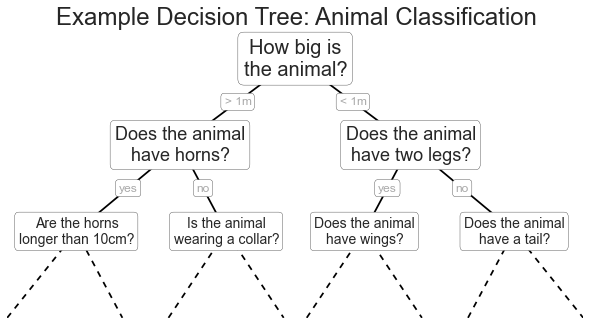

In [2]:
import fig_code
fig_code.plot_example_decision_tree()

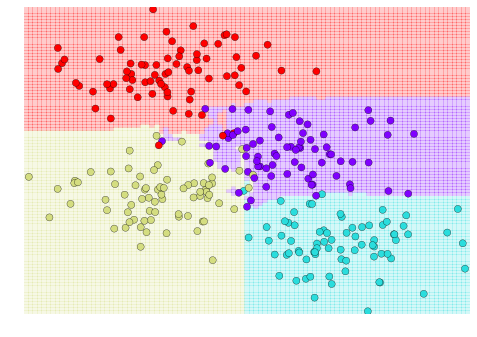

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
visualize_tree(clf, X, y, boundaries=False);

The following data scenarios are not good for random forests:
* y: lots of 0, few 1
* Structured data like images, neural network might be better
* Small data size, which might lead to overfitting
* High dimensional data, linear model might work better